<a href="https://www.kaggle.com/code/jimschacko/hotel-reservations-using-logistic-regression?scriptVersionId=118226229" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')

In [3]:
#EDA
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
dataset.shape

(36275, 19)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
dataset.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [7]:
#searching for null or Nan vales
dataset.isnull().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [8]:
dataset.select_dtypes(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...,...
36270,INN36271,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,INN36272,Meal Plan 1,Room_Type 1,Online,Canceled
36272,INN36273,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,INN36274,Not Selected,Room_Type 1,Online,Canceled


In [9]:
dataset = dataset.drop(columns = 'Booking_ID')

In [10]:
dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [11]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [12]:
dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
dataset.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Not_Canceled'],
      dtype='object')

<AxesSubplot:xlabel='booking_status_Not_Canceled', ylabel='count'>

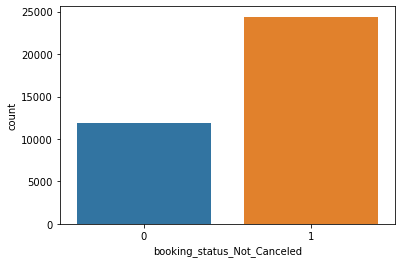

In [14]:
#exploring the target column
sns.countplot(dataset['booking_status_Not_Canceled'])

In [15]:
(dataset.booking_status_Not_Canceled == 0 ).sum()

11885

In [16]:
(dataset.booking_status_Not_Canceled == 1 ).sum()

24390

<AxesSubplot:title={'center':'correlation'}>

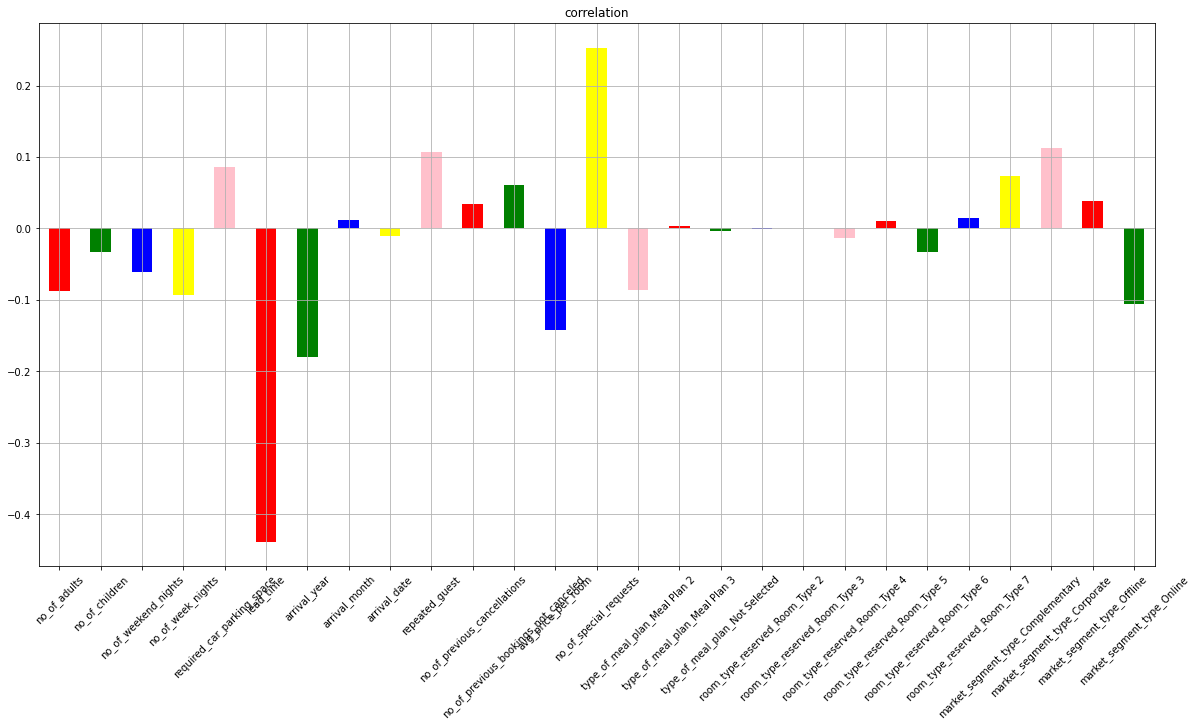

In [17]:
#correlation Index
dataset_2 = dataset.drop(columns = 'booking_status_Not_Canceled')
co = ['red','green','blue','yellow','pink']
dataset_2.corrwith(dataset['booking_status_Not_Canceled']).plot.bar(figsize = (20,10), 
                                                                    title = 'correlation', rot = 45, grid = True, color = co)

<AxesSubplot:>

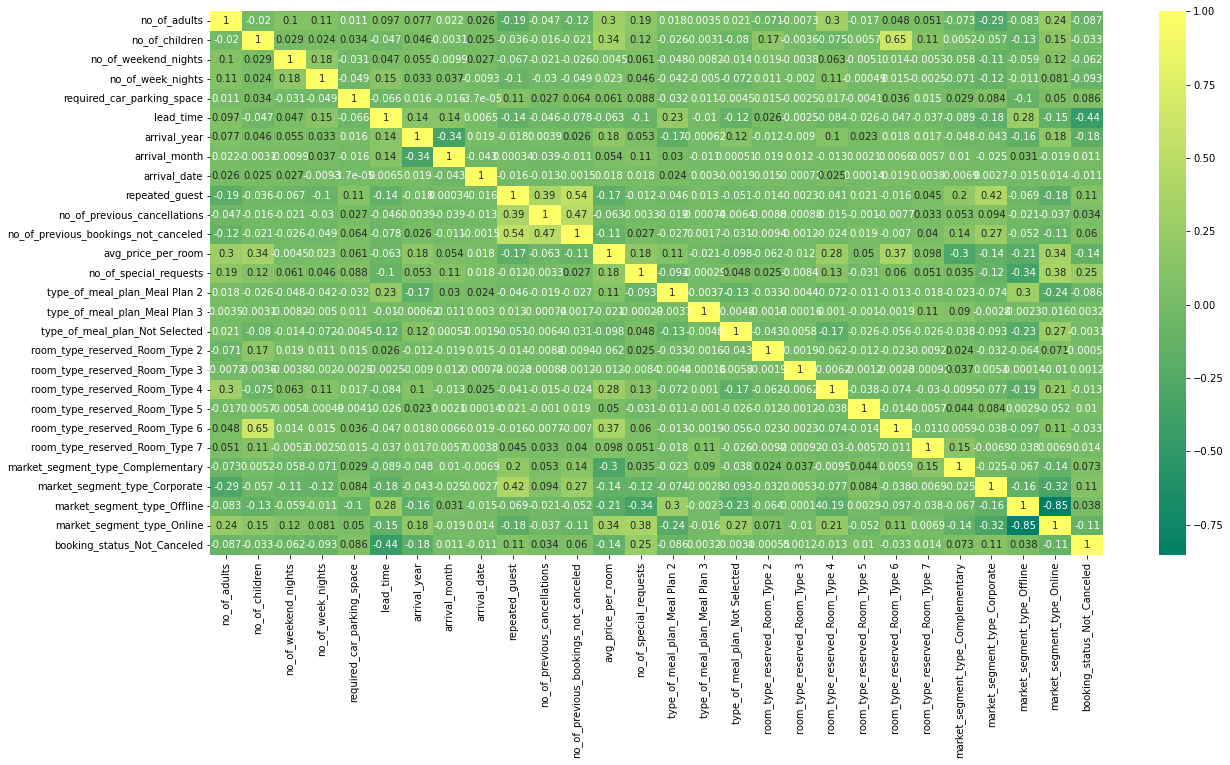

In [18]:
corr = dataset.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot = True, cmap = 'summer')

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

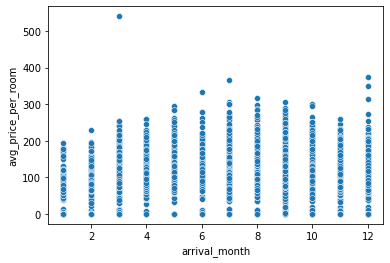

In [19]:
sns.scatterplot(data = dataset, x = 'arrival_month', y = 'avg_price_per_room')

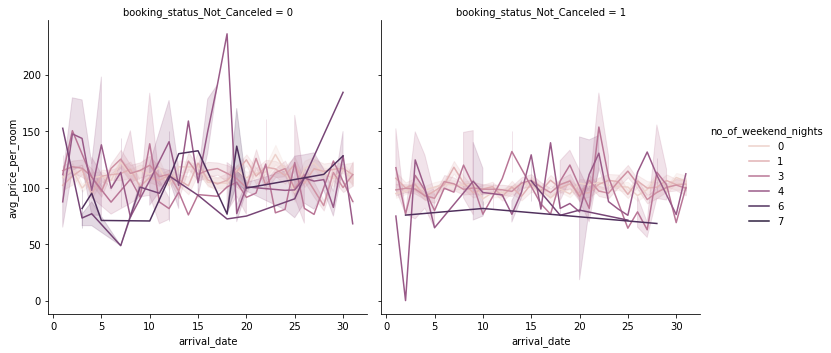

In [20]:
sns.relplot(data = dataset, x = 'arrival_date', y = 'avg_price_per_room', hue = 'no_of_weekend_nights' 
           , col = 'booking_status_Not_Canceled',kind="line")

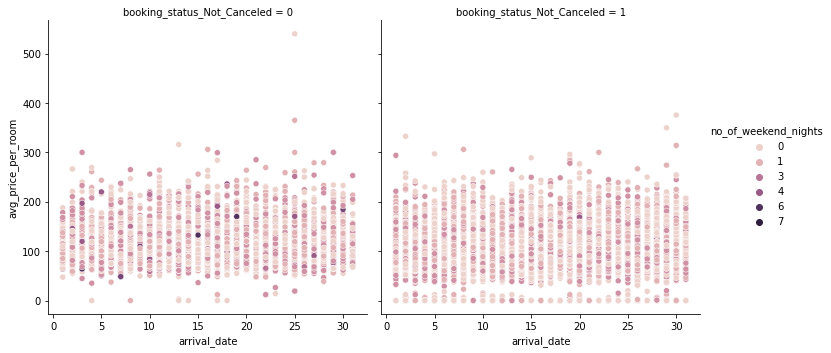

In [21]:
sns.relplot(data = dataset, x = 'arrival_date', y = 'avg_price_per_room', hue = 'no_of_weekend_nights' 
           , col = 'booking_status_Not_Canceled')

In [22]:
x= dataset.drop(columns = 'booking_status_Not_Canceled')
y =dataset['booking_status_Not_Canceled']

In [23]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_Not_Canceled, Length: 36275, dtype: uint8

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
x_train

array([[ 2.24168877, -0.26147739, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [ 0.30530819, -0.26147739,  0.21949504, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819,  4.68785788, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237],
       ...,
       [ 2.24168877, -0.26147739, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [-1.63107238, -0.26147739, -0.92921459, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819, -0.26147739, -0.92921459, ..., -0.24507181,
        -0.64247711,  0.75567237]])

In [27]:
x_test

array([[ 2.24168877, -0.26147739,  1.36820468, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [ 0.30530819, -0.26147739, -0.92921459, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819, -0.26147739, -0.92921459, ..., -0.24507181,
         1.55647568, -1.32332482],
       ...,
       [ 0.30530819, -0.26147739,  0.21949504, ..., -0.24507181,
         1.55647568, -1.32332482],
       [ 0.30530819, -0.26147739,  1.36820468, ..., -0.24507181,
        -0.64247711,  0.75567237],
       [ 0.30530819, -0.26147739,  0.21949504, ..., -0.24507181,
        -0.64247711,  0.75567237]])

In [28]:
y_test

16432    1
15128    0
16842    0
5488     0
31896    1
        ..
18705    1
7796     1
8282     1
34139    1
6926     0
Name: booking_status_Not_Canceled, Length: 11971, dtype: uint8

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred = logreg.predict(x_test)

In [31]:
#performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.803275,0.858804,0.830473,0.889137


In [32]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(logreg, X =x_train, y= y_train, cv = 10)

In [33]:
print('Accuracy is {:2}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2}%'.format(accuracies.std()*100))


Accuracy is 80.52183981595746%
Standard Deviation is 0.9768069506925036%


In [34]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
parameters = {'penalty': ['l1','l2','elasticnet'],
             'C': [0.10,0.20,0.25,0.30,0.40,0.50,0.60,0.75,0.90,1,2,5,10,15,100],
             'solver': ['liblinear','sag','saga','newton-cg','lbfgs']}
random_search = RandomizedSearchCV(estimator = logreg, param_distributions = parameters , n_iter = 10,
                                 n_jobs = -1, scoring =  'roc_auc', cv = 10, verbose =3)

In [35]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.25, 0.3, 0.4, 0.5,
                                              0.6, 0.75, 0.9, 1, 2, 5, 10, 15,
                                              100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'sag', 'saga',
                                                   'newton-cg', 'lbfgs']},
                   scoring='roc_auc', verbose=3)

In [36]:
random_search.best_score_

0.863692008873812

In [37]:
random_search.best_estimator_

LogisticRegression(C=0.4, solver='sag')

In [38]:
#Final Model
from sklearn.linear_model import LogisticRegression
final_model = LogisticRegression(C=0.9, penalty='l1', solver='liblinear')
final_model.fit(x_train, y_train)

LogisticRegression(C=0.9, penalty='l1', solver='liblinear')

In [39]:
y_pred = final_model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
final_results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
final_results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.803191,0.858736,0.830453,0.889013


In [40]:
final = final_results.append(results)

In [41]:
final

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.803191,0.858736,0.830453,0.889013
0,Logistic Regression,0.803275,0.858804,0.830473,0.889137


In [42]:
#Cross validation of Final Model
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(final_model, X =x_train, y= y_train, cv = 10)
print('Accuracy is {:2}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2}%'.format(accuracies.std()*100))

Accuracy is 80.53829564287082%
Standard Deviation is 0.9547335588629247%
